# Data

In [ ]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Models

In [ ]:
# Define a convolutional neural network
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

# dense network (0 hidden layers)
def create_modelDense0():
    modelDense0 = Sequential()
    modelDense0.add(Flatten(input_shape=x_train.shape[1:]))
    modelDense0.add(Dense(num_classes))
    modelDense0.add(Activation('softmax'))

    return modelDense0

# dense network (1 hidden layer)
def create_modelDense1():
    modelDense1 = Sequential()
    modelDense1.add(Flatten(input_shape=x_train.shape[1:]))
    modelDense1.add(Dense(512))
    modelDense1.add(Activation('relu'))
    modelDense1.add(Dropout(0.5))
    modelDense1.add(Dense(num_classes))
    modelDense1.add(Activation('softmax'))

    return modelDense1

# dense network (2 hidden layers)
def create_modelDense2():
    modelDense2 = Sequential()
    modelDense2.add(Flatten(input_shape=x_train.shape[1:]))
    modelDense2.add(Dense(512))
    modelDense2.add(Activation('relu'))
    modelDense2.add(Dropout(0.5))
    modelDense2.add(Dense(512))
    modelDense2.add(Activation('relu'))
    modelDense2.add(Dropout(0.5))
    modelDense2.add(Dense(num_classes))
    modelDense2.add(Activation('softmax'))

    return modelDense2

# dense network (3 hidden layers)
def create_modelDense3():
    modelDense3 = Sequential()
    modelDense3.add(Flatten(input_shape=x_train.shape[1:]))
    modelDense3.add(Dense(512))
    modelDense3.add(Activation('relu'))
    modelDense3.add(Dropout(0.5))
    modelDense3.add(Dense(512))
    modelDense3.add(Activation('relu'))
    modelDense3.add(Dropout(0.5))
    modelDense3.add(Dense(512))
    modelDense3.add(Activation('relu'))
    modelDense3.add(Dropout(0.5))
    modelDense3.add(Dense(num_classes))
    modelDense3.add(Activation('softmax'))

    return modelDense3

# dense network (4 hidden layers)
def create_modelDense4():
    modelDense4 = Sequential()
    modelDense4.add(Flatten(input_shape=x_train.shape[1:]))
    modelDense4.add(Dense(512))
    modelDense4.add(Activation('relu'))
    modelDense4.add(Dropout(0.5))
    modelDense4.add(Dense(512))
    modelDense4.add(Activation('relu'))
    modelDense4.add(Dropout(0.5))
    modelDense4.add(Dense(512))
    modelDense4.add(Activation('relu'))
    modelDense4.add(Dropout(0.5))
    modelDense4.add(Dense(512))
    modelDense4.add(Activation('relu'))
    modelDense4.add(Dropout(0.5))
    modelDense4.add(Dense(num_classes))
    modelDense4.add(Activation('softmax'))

    return modelDense4

# CNN with sigmoid
def create_modelSigmoid():
    modelSigmoid = Sequential()
    modelSigmoid.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
    modelSigmoid.add(Activation('sigmoid'))
    modelSigmoid.add(Conv2D(32, (3, 3), padding='same'))
    modelSigmoid.add(Activation('sigmoid'))
    modelSigmoid.add(MaxPooling2D(pool_size=(2, 2)))
    modelSigmoid.add(Dropout(0.25))

    modelSigmoid.add(Conv2D(64, (3, 3), padding='same'))
    modelSigmoid.add(Activation('sigmoid'))
    modelSigmoid.add(Conv2D(64, (3, 3), padding='same'))
    modelSigmoid.add(Activation('sigmoid'))
    modelSigmoid.add(MaxPooling2D(pool_size=(2, 2)))
    modelSigmoid.add(Dropout(0.25))

    modelSigmoid.add(Flatten())
    modelSigmoid.add(Dense(512))
    modelSigmoid.add(Activation('sigmoid'))
    modelSigmoid.add(Dropout(0.5))
    modelSigmoid.add(Dense(num_classes))
    modelSigmoid.add(Activation('softmax'))

    return modelSigmoid

# convolutional network without dropout, no data augmentation
def create_modelNoDropout():
    modelNoDropout = Sequential()
    modelNoDropout.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
    modelNoDropout.add(Activation('relu'))
    modelNoDropout.add(Conv2D(32, (3, 3)))
    modelNoDropout.add(Activation('relu'))
    modelNoDropout.add(MaxPooling2D(pool_size=(2, 2)))

    modelNoDropout.add(Conv2D(64, (3, 3), padding='same'))
    modelNoDropout.add(Activation('relu'))
    modelNoDropout.add(Conv2D(64, (3, 3)))
    modelNoDropout.add(Activation('relu'))
    modelNoDropout.add(MaxPooling2D(pool_size=(2, 2)))

    modelNoDropout.add(Flatten())
    modelNoDropout.add(Dense(512))
    modelNoDropout.add(Activation('relu'))
    modelNoDropout.add(Dense(num_classes))
    modelNoDropout.add(Activation('softmax'))

    return modelNoDropout

# CNN one 5x5 filter
def create_model5():
    model5 = Sequential()
    model5.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
    model5.add(Activation('relu'))
    model5.add(MaxPooling2D(pool_size=(2, 2)))
    model5.add(Dropout(0.25))

    model5.add(Conv2D(64, (5, 5), padding='same'))
    model5.add(Activation('relu'))
    model5.add(MaxPooling2D(pool_size=(2, 2)))
    model5.add(Dropout(0.25))

    model5.add(Flatten())
    model5.add(Dense(512))
    model5.add(Activation('relu'))
    model5.add(Dropout(0.5))
    model5.add(Dense(num_classes))
    model5.add(Activation('softmax'))

    return model5

# Train

In [ ]:
def train(model, epochs, data_augmentation, opt):

    # Compile the model before using it
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(model.summary())

    # create a callback that will save the best model while training
    save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

    # train without data augmentation
    if not data_augmentation:
        print('Not using data augmentation.')
        history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_validate, y_validate),
                            shuffle=True,
                            callbacks=[save_best_model],
                            verbose=0)

    # train with data augmentation
    else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

        # Compute quantities required for feature-wise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)

        # Fit the model on the batches generated by datagen.flow().
        history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                            steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                            epochs=epochs,
                            validation_data=(x_validate, y_validate),
                            callbacks=[save_best_model],
                            verbose=0)
    
    return history


# Part 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

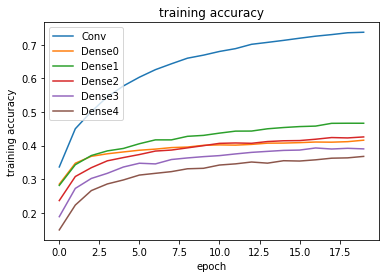

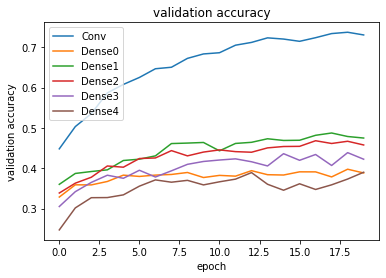

Test accuracy convolutional network: 0.732699990272522
Test accuracy dense network (0 hidden layers): 0.39719998836517334
Test accuracy dense network (1 hidden layers): 0.487199991941452
Test accuracy dense network (2 hidden layers): 0.46959999203681946
Test accuracy dense network (3 hidden layers): 0.4410000145435333
Test accuracy dense network (4 hidden layers): 0.38690000772476196


In [ ]:
# train and evaluate conv model
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model = create_model()
history = train(model, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate dense0 model
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelDense0 = create_modelDense0()
historyDense0 = train(modelDense0, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresDense0 = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate dense1 model
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelDense1 = create_modelDense1()
historyDense1 = train(modelDense1, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresDense1 = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate dense2 model
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelDense2 = create_modelDense2()
historyDense2 = train(modelDense2, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresDense2 = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate dense3 model
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelDense3 = create_modelDense3()
historyDense3 = train(modelDense3, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresDense3 = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate dense4 model
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelDense4 = create_modelDense4()
historyDense4 = train(modelDense4, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresDense4 = saved_model.evaluate(x_test, y_test, verbose=1)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(historyDense0.history['accuracy'])
plt.plot(historyDense1.history['accuracy'])
plt.plot(historyDense2.history['accuracy'])
plt.plot(historyDense3.history['accuracy'])
plt.plot(historyDense4.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv', 'Dense0', 'Dense1', 'Dense2', 'Dense3', 'Dense4'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(historyDense0.history['val_accuracy'])
plt.plot(historyDense1.history['val_accuracy'])
plt.plot(historyDense2.history['val_accuracy'])
plt.plot(historyDense3.history['val_accuracy'])
plt.plot(historyDense4.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv', 'Dense0', 'Dense1', 'Dense2', 'Dense3', 'Dense4'], loc='upper left')
plt.show()

print('Test accuracy convolutional network:', scores[1])
print('Test accuracy dense network (0 hidden layers):', scoresDense0[1])
print('Test accuracy dense network (1 hidden layers):', scoresDense1[1])
print('Test accuracy dense network (2 hidden layers):', scoresDense2[1])
print('Test accuracy dense network (3 hidden layers):', scoresDense3[1])
print('Test accuracy dense network (4 hidden layers):', scoresDense4[1])

# Discussion

The convolutional network obtained the best results, followed by the dense networks with 1, 2, 3, 0 and 4 hidden layers.  The convolutional network is much better because it is sparse with shared weights that induce equivariance.  This simplifies the optimization, while requiring less data to generalize well.  As we increase the number of dense hidden layers, the optimization is more difficult and unfortunately, the optimizer (RMSprop) fails to find the best weights.  In theory, with at least 2 hidden layers, we could set the weights of all hidden layers except for the first one to compute the identity function.  This should give us results as good as for one hidden layer, but the optimizer fails to find this solution.  

NB: Overfitting is not a problem since similar results are observed for training accuracy and validation accuracy.  In theory, gradients should not vanish since we are using ReLU and the networks are not very deep, but gradient vanishing might still be a problem.

# Part 2

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

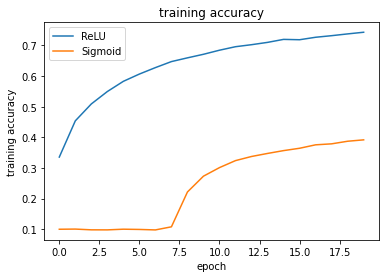

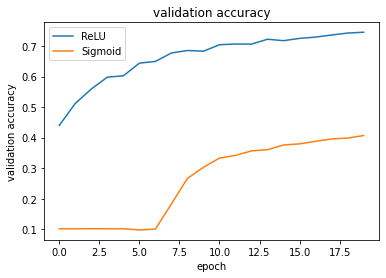

Test accuracy convolutional network with ReLU: 0.7373999953269958
Test accuracy convolutional network with sigmoid: 0.41530001163482666


In [ ]:
# train and evaluate conv model with ReLU
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model = create_model()
history = train(model, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate conv model with Sigmoid
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelSigmoid = create_modelSigmoid()
historySigmoid = train(modelSigmoid, epochs=20, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresSigmoid = saved_model.evaluate(x_test, y_test, verbose=1)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(historySigmoid.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(historySigmoid.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='upper left')
plt.show()

print('Test accuracy convolutional network with ReLU:', scores[1])
print('Test accuracy convolutional network with sigmoid:', scoresSigmoid[1])

# Discussion

ReLU gives much better results than sigmoid units.  Sigmoid units are more subject to the gradient vanishing problem.  The lack of improvement in the first few epochs might be due to the fact that the starting point is in one of the tails of the sigmoid with near 0 gradient. 

NB: Overfitting is not a problem.

# Part 3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_20 (Activation)   (None, 15, 15, 64)       

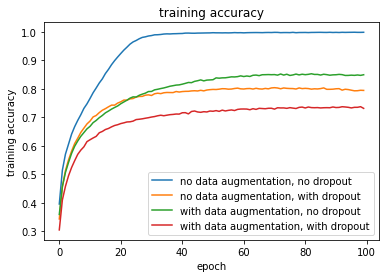

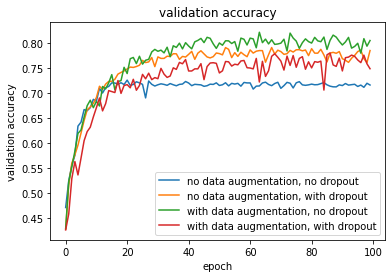

Test accuracy convolutional network without data augmentation and without dropout: 0.7150999903678894
Test accuracy convolutional network without data augmentation and with dropout: 0.7804999947547913
Test accuracy convolutional network with data augmentation and without dropout: 0.809499979019165
Test accuracy convolutional network with data augmentation and with dropout: 0.7749000191688538


In [ ]:
# train and evaluate conv model: no data augmentation, no dropout
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelNoDropout = create_modelNoDropout()
historyNoDataAugmentationNoDropout = train(modelNoDropout, epochs=100, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresNoDataAugmentationNoDropout = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate conv model: no data augmentation, with dropout
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model = create_model()
historyNoDataAugmentationDropout = train(model, epochs=100, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresNoDataAugmentationDropout = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate conv model: with data augmentation, no dropout
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
modelNoDropout = create_modelNoDropout()
historyDataAugmentationNoDropout = train(modelNoDropout, epochs=100, data_augmentation=True, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresDataAugmentationNoDropout = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate conv model: with data augmentation, with dropout
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model = create_model()
historyDataAugmentationDropout = train(model, epochs=100, data_augmentation=True, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresDataAugmentationDropout = saved_model.evaluate(x_test, y_test, verbose=1)

# Plot training accuracy
plt.plot(historyNoDataAugmentationNoDropout.history['accuracy'])
plt.plot(historyNoDataAugmentationDropout.history['accuracy'])
plt.plot(historyDataAugmentationNoDropout.history['accuracy'])
plt.plot(historyDataAugmentationDropout.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['no data augmentation, no dropout', 'no data augmentation, with dropout', 'with data augmentation, no dropout', 'with data augmentation, with dropout'], loc='lower right')
plt.show()

# Plot validation accuracy
plt.plot(historyNoDataAugmentationNoDropout.history['val_accuracy'])
plt.plot(historyNoDataAugmentationDropout.history['val_accuracy'])
plt.plot(historyDataAugmentationNoDropout.history['val_accuracy'])
plt.plot(historyDataAugmentationDropout.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['no data augmentation, no dropout', 'no data augmentation, with dropout', 'with data augmentation, no dropout', 'with data augmentation, with dropout'], loc='lower right')
plt.show()

print('Test accuracy convolutional network without data augmentation and without dropout:', scoresNoDataAugmentationNoDropout[1])
print('Test accuracy convolutional network without data augmentation and with dropout:', scoresNoDataAugmentationDropout[1])
print('Test accuracy convolutional network with data augmentation and without dropout:', scoresDataAugmentationNoDropout[1])
print('Test accuracy convolutional network with data augmentation and with dropout:', scoresDataAugmentationDropout[1])

# Discussion

The regime without dropout and without data augmentation learns the fastest.  However, it also overfits the most as we increase the number of iterations.  Data augmentation helps tremendously to improve generalization. Dropout helps to improve generalization when there is no data augmentation, but it worsens the results when there is data augmentation.

# Part 4

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

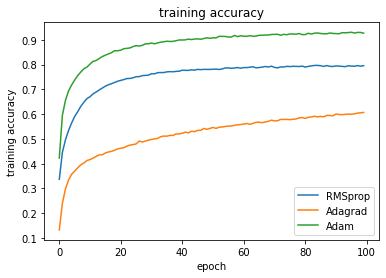

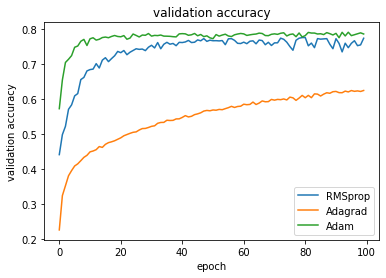

Test accuracy convolutional network with RMSprop: 0.7681999802589417
Test accuracy convolutional network with Adagrad: 0.6201000213623047
Test accuracy convolutional network with Adam: 0.7832000255584717


In [ ]:
# train and evaluate conv model with RMSprop
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model = create_model()
history = train(model, epochs=100, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate conv model with Adagrad
optimizer = keras.optimizers.Adagrad()
model = create_model()
historyAdagrad = train(model, epochs=100, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresAdagrad = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate conv model with Adam
optimizer = keras.optimizers.Adam()
model = create_model()
historyAdam = train(model, epochs=100, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scoresAdam = saved_model.evaluate(x_test, y_test, verbose=1)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(historyAdagrad.history['accuracy'])
plt.plot(historyAdam.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adagrad', 'Adam'], loc='lower right')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(historyAdagrad.history['val_accuracy'])
plt.plot(historyAdam.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adagrad', 'Adam'], loc='lower right')
plt.show()

print('Test accuracy convolutional network with RMSprop:', scores[1])
print('Test accuracy convolutional network with Adagrad:', scoresAdagrad[1])
print('Test accuracy convolutional network with Adam:', scoresAdam[1])

# Discussion

The Adam optimizer performed best, followed by RMSprop and then Adagrad.  This is consistent with the theory.  Adagrad decays the learning rate quickly, which slows down its convergence rate.  RMSprop uses a moving average to adjust the learning rate, but it lacks momentum.  Adam also adapts the learning rate based on a moving average and it uses momentum to further accelerate convergence.

# Part 5

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

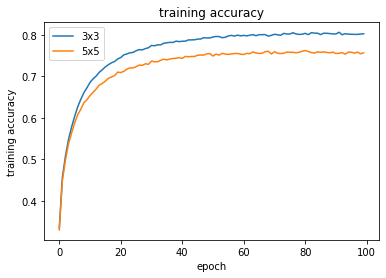

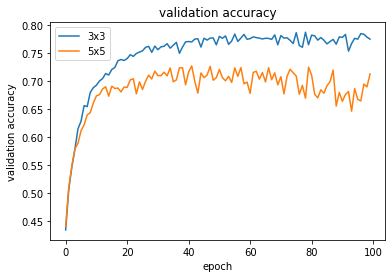

Test accuracy convolutional network with 3x3 filters: 0.7735000252723694
Test accuracy convolutional network with 5x5 filters: 0.7185999751091003


In [ ]:
# train and evaluate conv model with 3x3 filters
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model = create_model()
history = train(model, epochs=100, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=1)

# train and evaluate conv model with 5x5 filters
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model5 = create_model5()
history5 = train(model5, epochs=100, data_augmentation=False, opt=optimizer)
saved_model = load_model('best_model.h5')
scores5 = saved_model.evaluate(x_test, y_test, verbose=1)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['3x3', '5x5'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['3x3', '5x5'], loc='upper left')
plt.show()

print('Test accuracy convolutional network with 3x3 filters:', scores[1])
print('Test accuracy convolutional network with 5x5 filters:', scores5[1])

# Discussion

The network with two stacked 3x3 filters for each convolutional layer performed better than a single 5x5 filter.  This is consistent with the theory.  By stacking pairs of 3x3 filters, we obtain deeper networks with fewer parameters while ensuring that a 5x5 receptive field is still used in the computation of each feature map.